# Titanic - Dataset

Variable	Definition	Key
Survival:	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
Sex:	
Age: in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Dataset and Overview

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA (Exploratory Data Analysis)

## Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

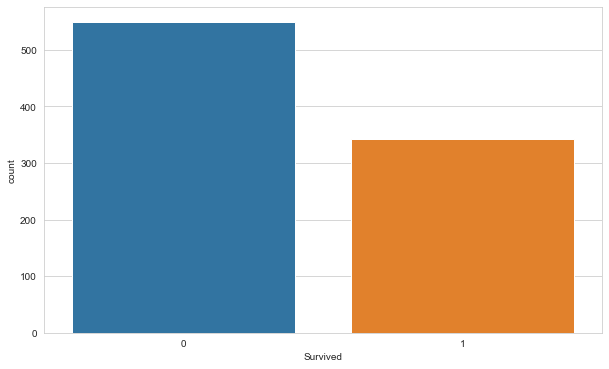

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df)

### Male and Female

<AxesSubplot:xlabel='Survived', ylabel='count'>

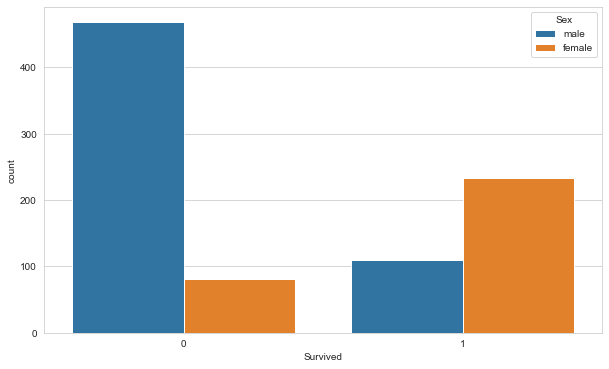

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df, hue='Sex')

Conclusion: We can see that more than more women where saved than men.

### Age

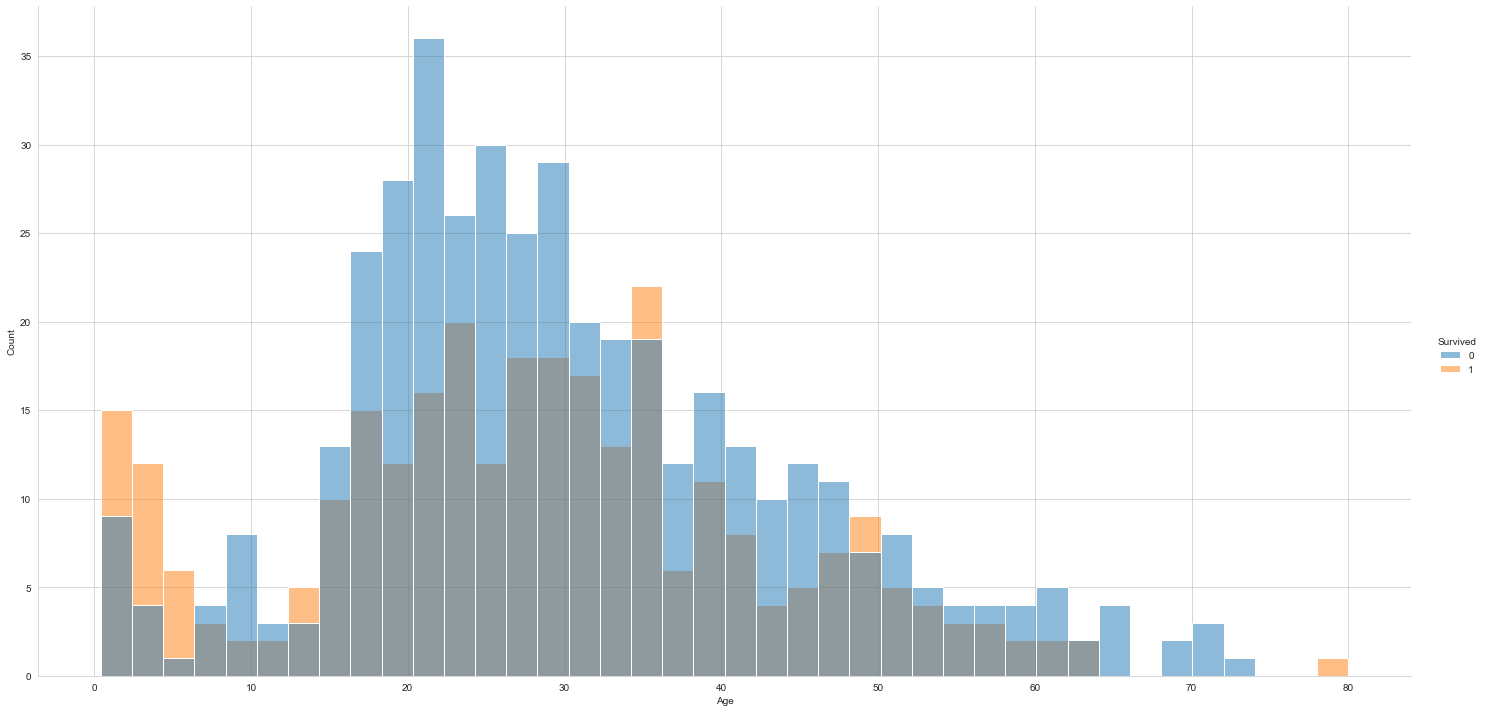

In [9]:
sns.displot(x='Age', data=df, hue='Survived', aspect=2, height=10, bins=40)

### Pclass (Ticket Class)

In [10]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

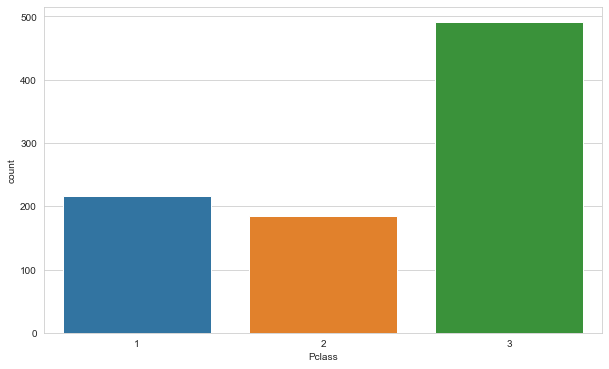

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

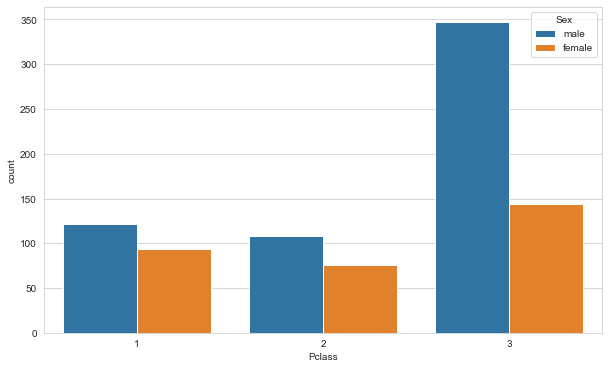

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', data=df, hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

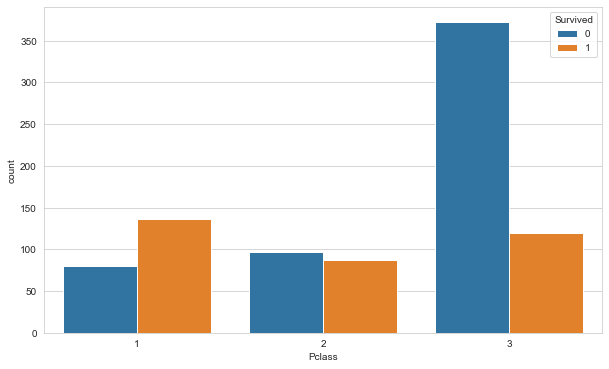

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', data=df, hue='Survived')

Conclusion: We can make the assumption that if you where in the 1st and 2nd class you had a higher probability to surive than if you where in the 3rd class. We can also see that in the 3rd class there were more male passengers compared to female passengers, which indicates that if you were a male in the 3rd class you would have had a very low probability to surive.

### Sibling and Spouses on the Boat

<AxesSubplot:xlabel='SibSp', ylabel='count'>

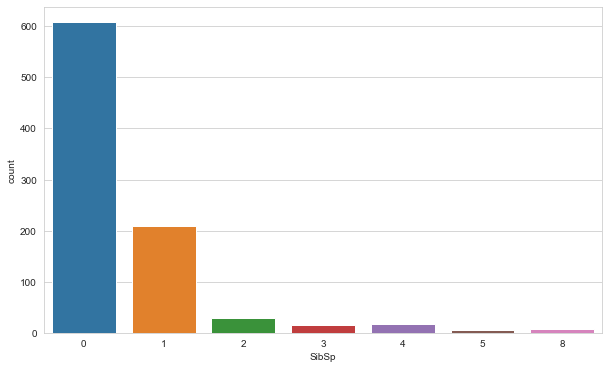

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='SibSp', data=df)

Conclusion: We can see that the majority of the people went alone on the titanic and a few went eight with a spouse or with one sibling

### Parents and Kids on the Boat

<AxesSubplot:xlabel='Parch', ylabel='count'>

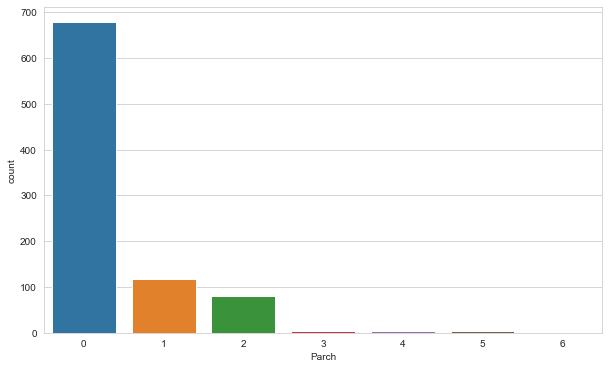

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Parch', data=df)

Conslusion: Similar to the previous graph, we can see most of the people went alone. There are a few families on the boat, with either one or two parents.

### Fare for the Boat

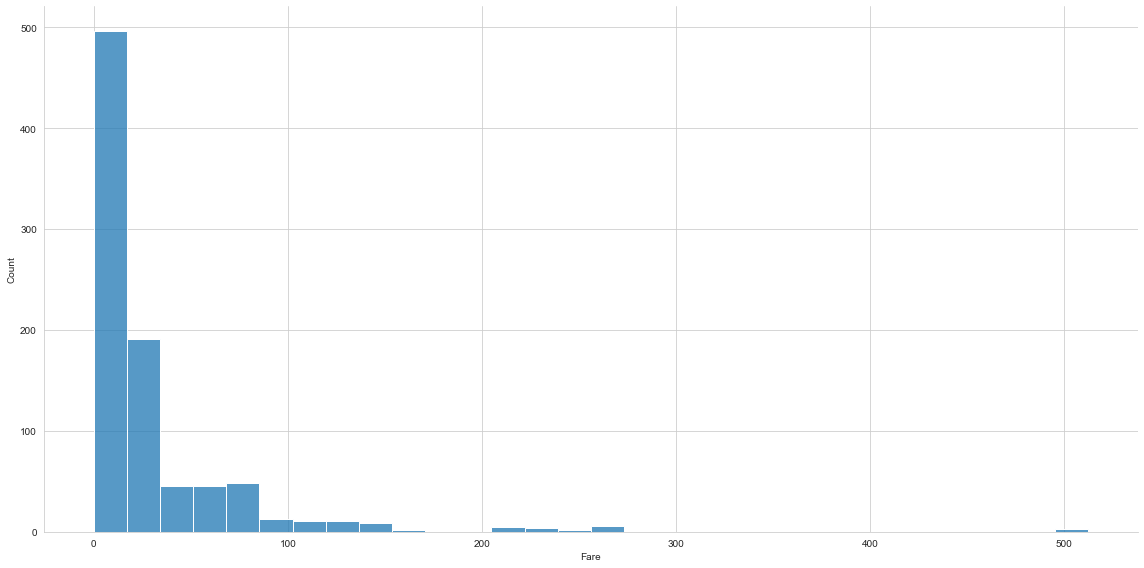

In [16]:
sns.displot(x='Fare', data=df, aspect=2, height=8, bins=30)

In [17]:
df[df['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

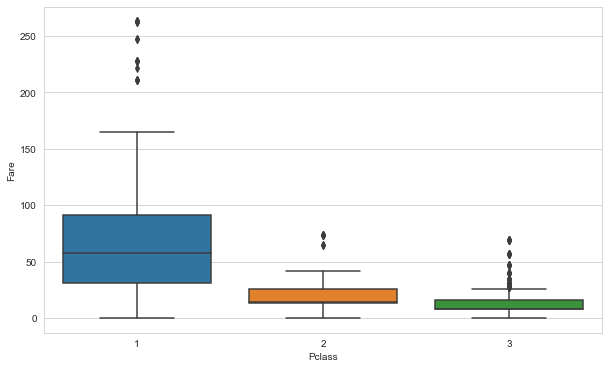

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', data=df[df['Fare'] < 300])

Conclusion: We can see that the majority of the tickets were under $50, and that there are 3 outliers in pclass 1 with a price of 512 per ticket.

## Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

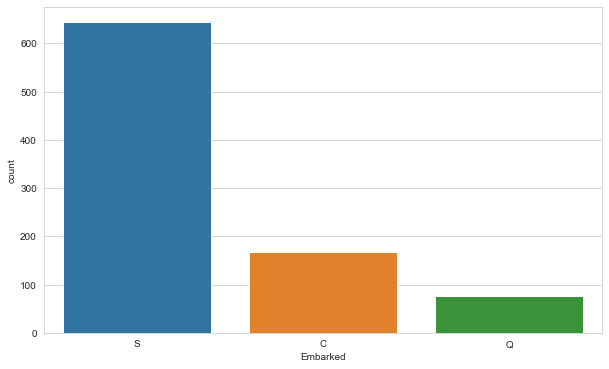

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

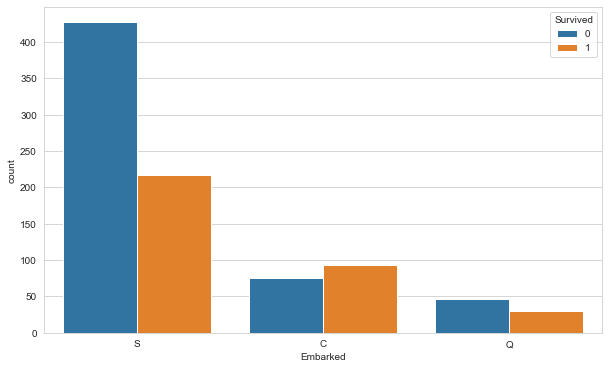

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked', data=df, hue='Survived')

# Data Cleaning
## Missing Values

<AxesSubplot:>

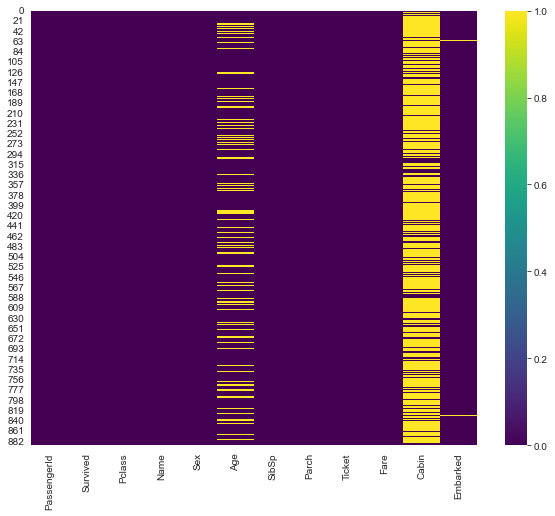

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')

### Embarked

Drop the 2 entries that has NaN for Embarked

In [29]:
df = df.drop([61,829])

### Cabin
Drop Cabin feature, there's too many missing values.

In [30]:
df = df.drop('Cabin', axis=1)

### Age
Use the mean age of the pclass feature to assign a value to the missing age values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

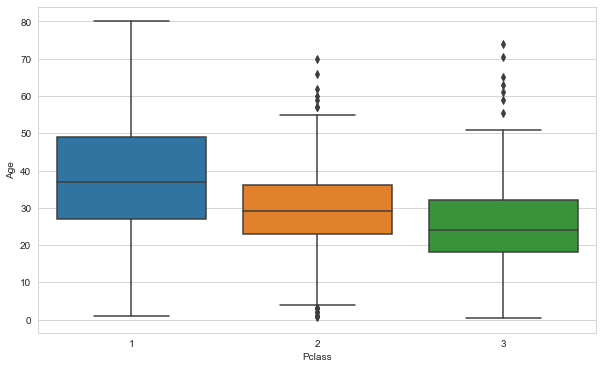

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=df)

In [55]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [66]:
def get_age(age, pclass):
    if pd.isnull(age):
        if pclass == 1:
            return 38
        if pclass == 2:
            return 30
        else: return 25
    else: return age        

In [69]:
df['Age'] = df.apply(lambda x: get_age(x['Age'], x['Pclass']), axis=1)

## Categorical Features

In [89]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


# Train Test Split

In [91]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = df['Survived']

In [94]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Scaling Data

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
X_train = scaler.fit_transform(X_train)

In [104]:
X_test = scaler.transform(X_test)

# Logistic Model

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression()

In [107]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [109]:
log_pred = logmodel.predict(X_test)

## Evaluation - Logistic Model

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
print(confusion_matrix(y_test, log_pred))
print('\n')
print(classification_report(y_test, log_pred))

[[125  11]
 [ 28  59]]


              precision    recall  f1-score   support

           0       0.82      0.92      0.87       136
           1       0.84      0.68      0.75        87

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



# Test Dataset

In [154]:
df_test = pd.read_csv('test.csv')

In [155]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Fix NaN values in Age, drop Cabin feature

In [157]:
df_test['Age'] = df_test.apply(lambda x: get_age(x['Age'], x['Pclass']), axis=1)

In [158]:
df_test = df_test.drop('Cabin', axis=1)

### Fix NaN value of Fare feature

In [159]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [160]:
df[df['Pclass'] == 3]['Fare'].mean()

13.675550101832997

In [169]:
df_test['Fare'] = df_test['Fare'].replace(to_replace=np.nan, value=13.68)

### Get dummy variables

In [170]:
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

In [171]:
df_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


In [172]:
test_X = df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

### Scale Test set

In [173]:
test_X = scaler.transform(test_X)

### Make Predictions

In [176]:
predictions = logmodel.predict(test_X)

In [178]:
df_test['Survived'] = predictions

In [180]:
df_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,1


In [183]:
df_test[['PassengerId', 'Survived']].to_csv('titanic_pred.csv', index=False)